In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Estadística descriptiva

## Gapminder

Si gapminder no está instalado, ejecutrar el siguiente comando para instalarlo

In [ ]:
#pip install gapminder

In [ ]:
from gapminder import gapminder
display(gapminder)

In [ ]:
gapminder.head()

In [ ]:
# Vemos todos los países en la base
gapminder["country"].unique()

In [ ]:
# Cuántos países son?
gapminder["country"].nunique()

In [ ]:
# Si queremos ver cuántos países hay en cada continente...
# podemos agregupar por continente y ver el tamaño de cada grupo
gapminder.groupby("continent").size()

In [ ]:
# Pero cada país aparece varias veces, con datos de distintos años.
# Para contar sin repeticion usamos nuevamente nunique
gapminder.groupby("continent")["country"].nunique()

In [ ]:
# Si queremos calcular porcentajes, dividimos por la cantidad total de paises
totalPaises = gapminder["country"].nunique()
gapminder.groupby("continent")["country"].nunique() / totalPaises

In [ ]:
# O podemos usar el comando value_counts y pasarle un parámetro para que nos de los valores normalizados.
# (la normalización lleva la suma total a 1)
gapminder[["continent", "country"]].drop_duplicates().continent.value_counts(normalize=True)

In [ ]:
# Vemos todos los años disponibles
print(gapminder["year"].unique())

In [ ]:
# Tenemos datos de todos los países todos los años?
# Agrupamos los datos por año y calculamos el tamaño de cada bloque
gapminder.groupby("year").size()

In [ ]:
# O podemos usar directamente el comando value_counts
gapminder.year.value_counts()

In [ ]:
# También podemos por ejemplo calcular la poblacion total por año
gapminder.groupby("year")["pop"].sum()

### Gráficos simples
Vamos a graficar la población total mundial en función del año.

In [ ]:
pobAno = gapminder.groupby("year")["pop"].sum()
type(pobAno)

In [ ]:
# Pandas series son arrays indexados por otra variable
print(pobAno[2007])

In [ ]:
# Opción 1
# Usamos la función plot de series de pandas
pobAno.plot()

In [ ]:
# Opcion 2
# Asignamos los valores a variables (arrays de numpy) y graficamos las variables
x = pobAno.index
y = pobAno.values
plt.plot(x,y)

In [ ]:
# Vamos a analizar los datos de 2007
datos2007 = gapminder[gapminder["year"]==2007]

In [ ]:
# Queremos ver si hay relación entre el producto bruto y la expectativa de vida
plt.plot(datos2007.gdpPercap, datos2007.lifeExp)
plt.show()

In [ ]:
# Ay no, eso no, hacemos un "scatter plot"
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.show()

In [ ]:
# Se ve mejor la correlación si usamos escala logaritmica en el eje X
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')
plt.show()

Vamos a mejorar un poco el gráfico

In [ ]:
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.show()

Reemplacemos las marcas en el eje $x$ 10³, 10⁴, 10⁵ con 1k, 10k y 100k. 

In [ ]:
plt.scatter(datos2007.gdpPercap, datos2007.lifeExp)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

In [ ]:
# Alcenamos la población como un array de numpy: np_pop
np_pop = np.array(datos2007["pop"])
np_pop2 = np_pop*2
# Usamos scatterplot de seaborn para poder personalizar mejor el grafico
sns.scatterplot(x = datos2007['gdpPercap'], y = datos2007['lifeExp'], hue = datos2007['continent'], size = np_pop2, sizes=(20,400))
plt.grid(True)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

In [ ]:
# Aumenta el tamaño del gráfico
plt.figure(dpi=150)
# Alcenamos la población como un array de numpy: np_pop
np_pop = np.array(datos2007["pop"])
np_pop2 = np_pop*2
# Usamos scatterplot de seaborn para poder personalizar mejor el grafico
sns.scatterplot(x = datos2007['gdpPercap'], y = datos2007['lifeExp'], hue = datos2007['continent'], size = np_pop2, sizes=(20,400))
plt.grid(True)
plt.xscale('log')
plt.xlabel('GDP per Capita [en USD]')
plt.ylabel('Expectativa de vida [en años]')
plt.title('Desarrollo Mundial en 2007')
plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
plt.show()

1.9 Calcular la media y mediana de la expectativa de vida entre países en 1952 usando los datos de gapminder (variable: lifeExp).

1.10 Definir desvío estándar. ¿Por qué la diferencia en el numerador está elevada al cuadrado? Escribir una función 
de Python que calcule el desvío estándar. Comparar el resultado de usar el método `.std()` de pandas.

1.11 Calcular el rango y el desvío estandar de la expectativa de vida (lifeExp) entre países tomando sólo el dataset gapminder para el año 1952.


# Palmerpenguins
## Visualización de datos

In [ ]:
pip install palmerpenguins

In [20]:
import pandas as pd
import seaborn as sns 
from palmerpenguins import load_penguins
sns.set_style('whitegrid')

In [21]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Text(0, 0.5, 'Masa corporal')

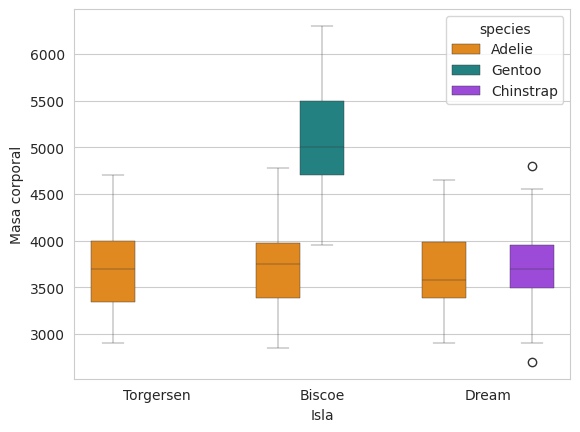

In [23]:
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = penguins,
            palette=['#FF8C00','#159090','#A034F0'],
            linewidth=0.3)
g.set_xlabel('Isla')
g.set_ylabel('Masa corporal')

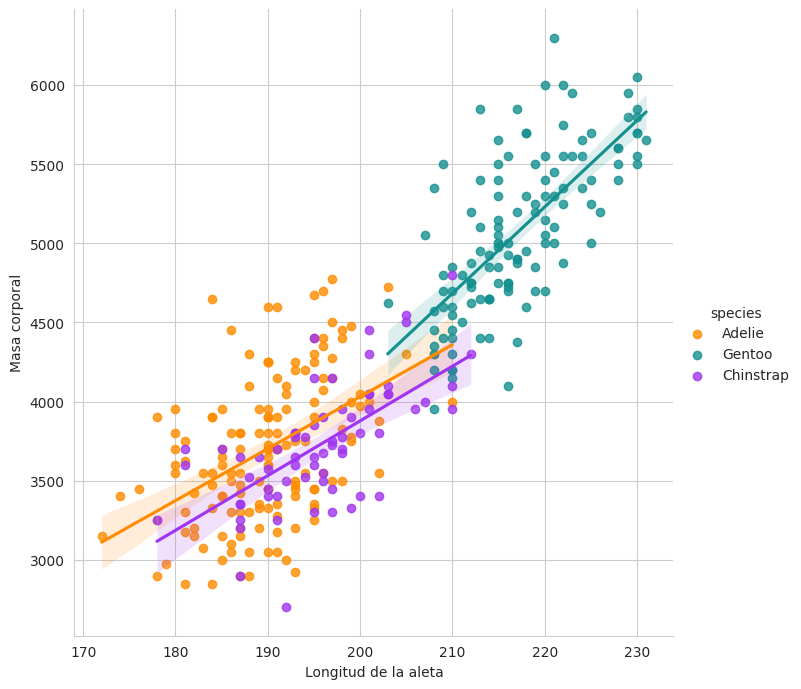

In [24]:
g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=penguins,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Longitud de la aleta')
g.set_ylabels('Masa corporal')